## Student Performance Indicator


# Import Data and Required Packages
###  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.
### Importing various models from scikit-learn which we will use to train our models

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('/kaggle/input/students-academic-achievement-dataset/study_performance.csv')

### Show Top 5 Records

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Shape of the dataset

In [4]:
df.shape

(1000, 8)

### Dataset information

- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

# Preliminary analysis

In [5]:
# Checking Missing values
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### There are no missing values in the data set

In [6]:
# Checking duplicate values
df.duplicated().sum()

0

#### There are no duplicates  values in the data set

In [7]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
# Checking the number of unique values of each column
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [9]:
# Check summary & statistics of data set
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insight
- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score  0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

In [10]:
# Checking for unique/inconsistent values in categorical columns
print("Categories in 'gender' variable: ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable: ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable: ",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable: ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable: ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:  ['female' 'male']
Categories in 'race_ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:  ['standard' 'free/reduced']
Categories in 'test preparation course' variable:  ['none' 'completed']


In [11]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# printing numerical & categorical columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### Adding columns for "Total Score" and "Average"

In [12]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [13]:
# Checking how many students got full marks in respective subjects
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [14]:
# Checking how many students got less than or equal to 20 marks in respective subjects

reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


#####  Insights
 - From above values we get students have performed the worst in Maths 
 - Best performance is in reading section

# Exploratory Data Analysis (EDA)

##  Histogram & KDE

<Axes: xlabel='average', ylabel='Count'>

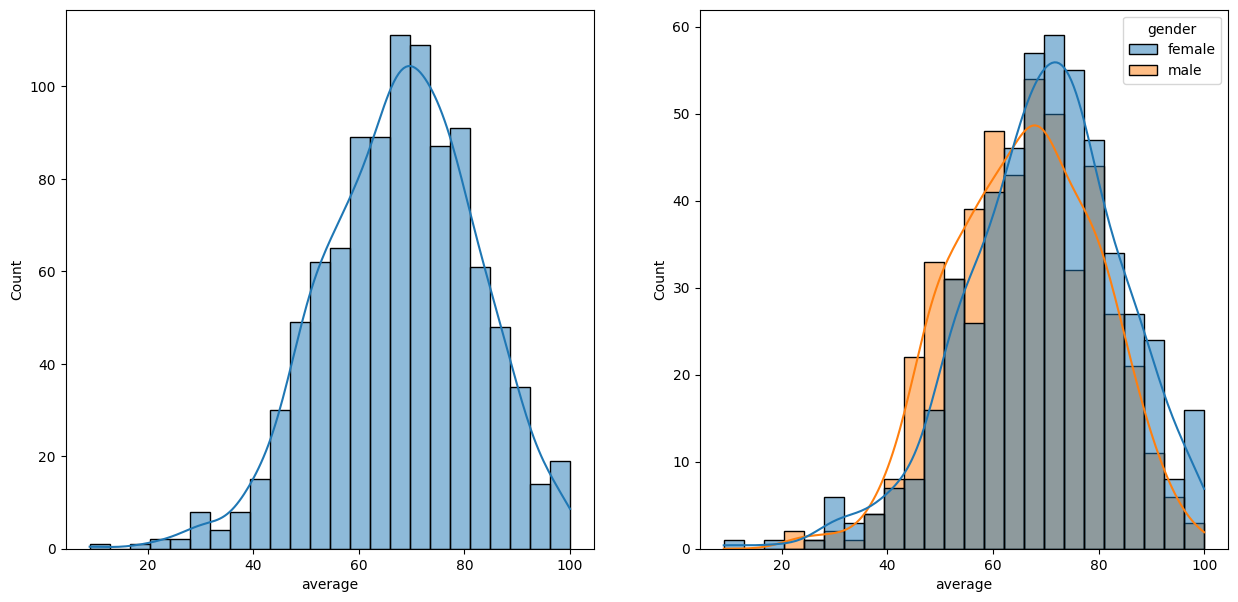

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',kde=True)
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')

<Axes: xlabel='total score', ylabel='Count'>

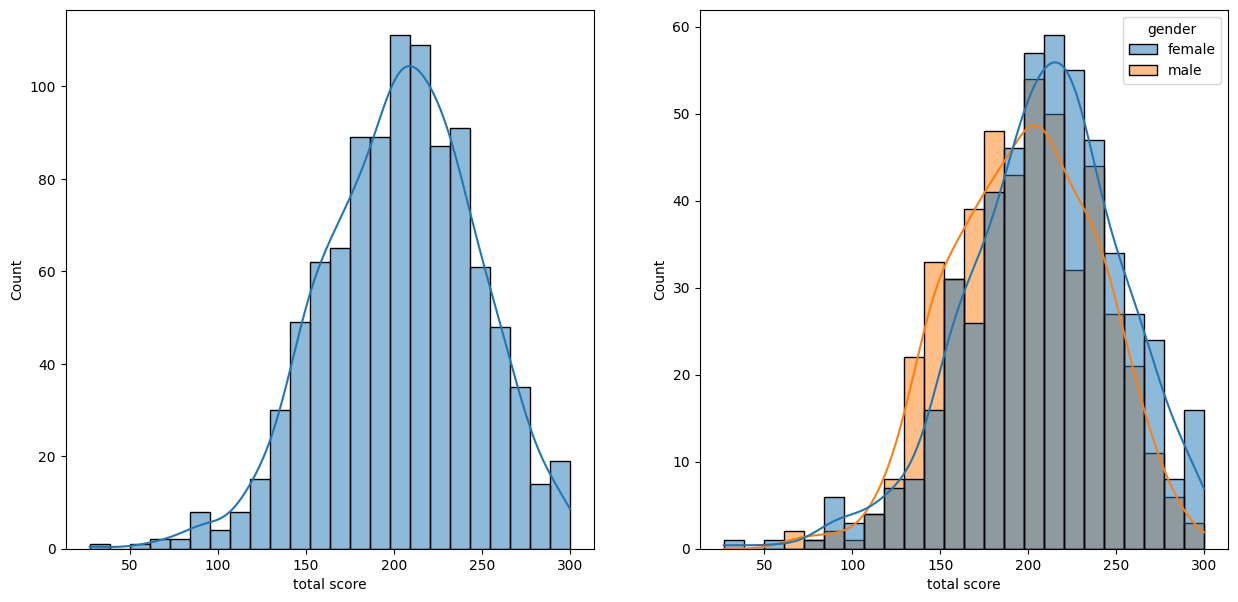

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total score',kde=True)
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')

#####  Insights
- Female students tend to perform well then male students.

<Axes: xlabel='average', ylabel='Count'>

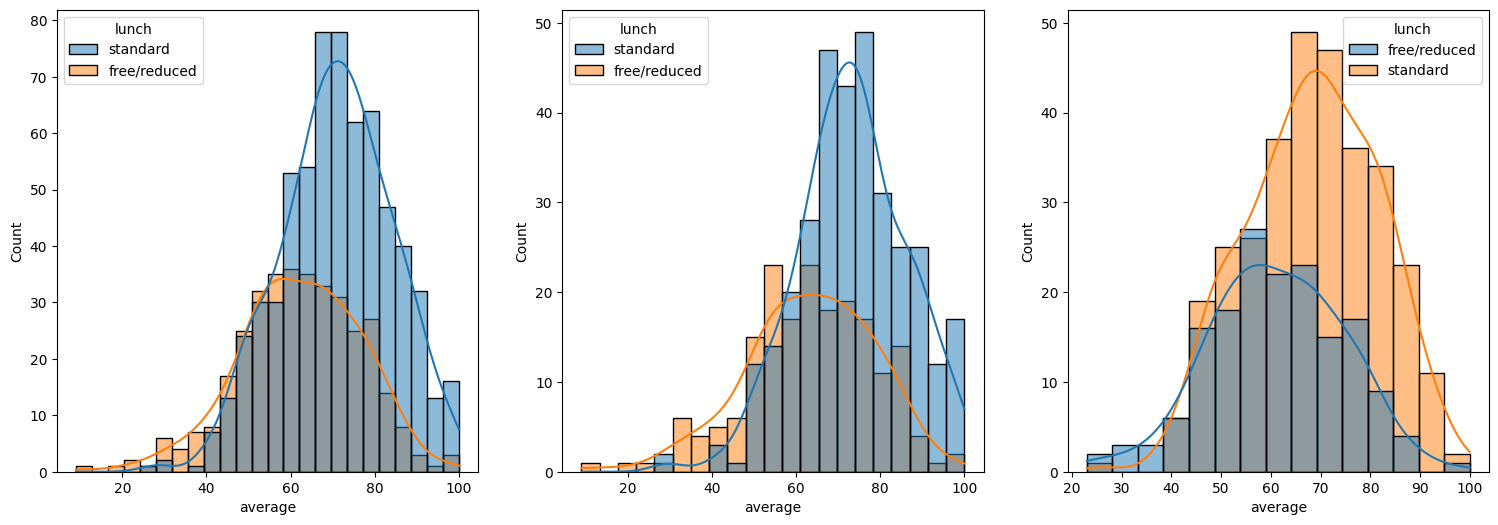

In [17]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')

#####  Insights
- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.

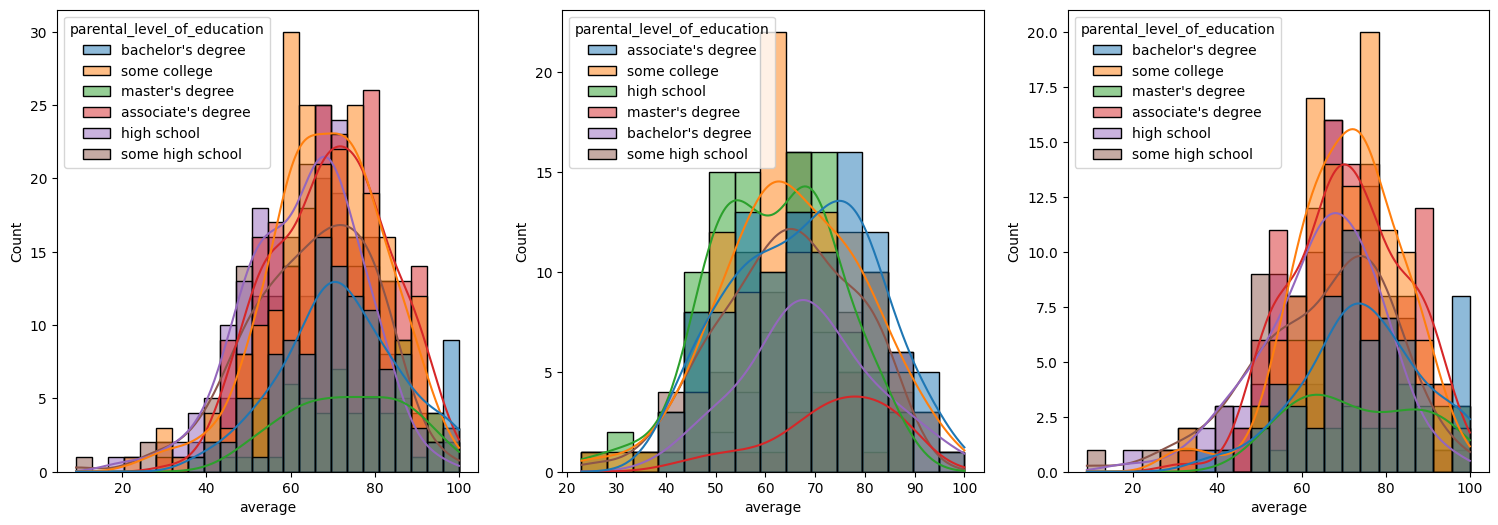

In [18]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')

#####  Insights
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

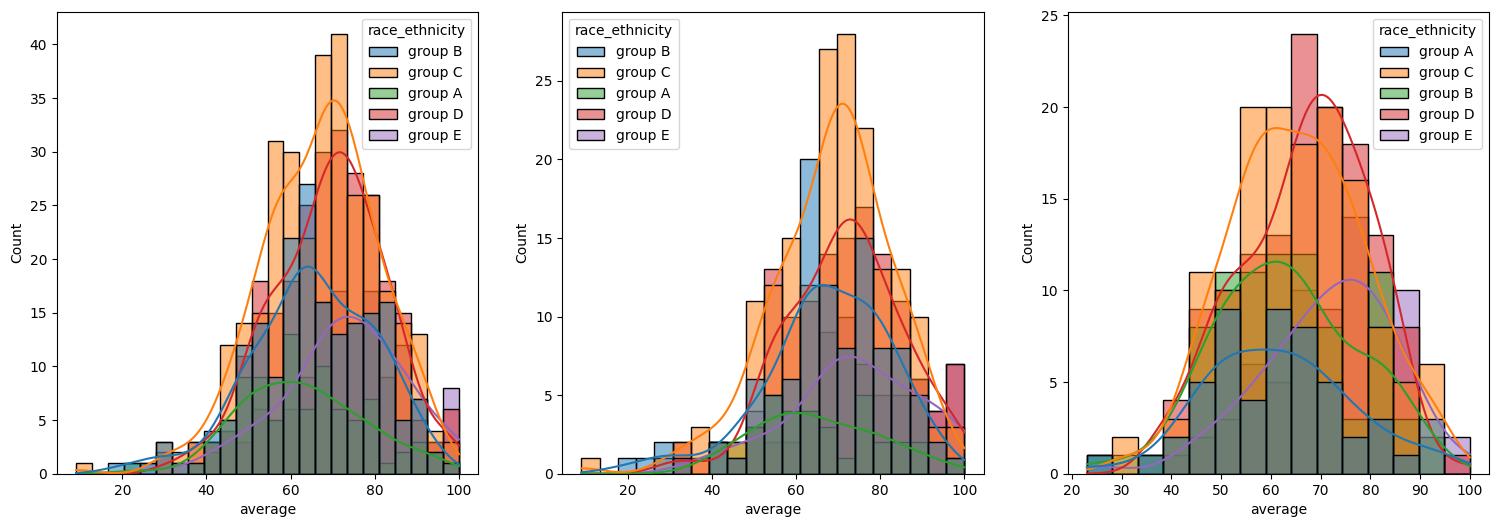

In [19]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

#####  Insights
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

### Creating helpful functions valuable analysis of various features

In [20]:
# writing a function to show count and percent of unique values in a feature
def countPercent(feature):
    f,ax=plt.subplots(1,2,figsize=(20,10))
    sns.countplot(y=df[feature],data=df,ax=ax[0])
    for container in ax[0].containers:
        ax[0].bar_label(container, size = 30)

    plt.pie(x=df[feature].value_counts(),labels=df[feature].value_counts().index,autopct='%1.1f%%')
    plt.show()


In [21]:
# Writing a function to show avg score of a feature in all three subjects
def subjectScore(feature):
    group_data = df.groupby(feature)
    f,ax=plt.subplots(3,1,figsize=(20,18))
    
    sns.barplot(y=group_data['math_score'].mean().index,x=group_data['math_score'].mean().values,palette = 'mako',ax=ax[0])
    ax[0].set_title('Math score',color='#005ce6',size=20)
    for container in ax[0].containers:
        ax[0].bar_label(container)

    sns.barplot(y=group_data['reading_score'].mean().index,x=group_data['reading_score'].mean().values,palette = 'flare',ax=ax[1])
    ax[1].set_title('Reading score', color='#005ce6',size=20)
    for container in ax[1].containers:
        ax[1].bar_label(container)

    sns.barplot(y=group_data['writing_score'].mean().index,x=group_data['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
    ax[2].set_title('Writing score', color='#005ce6',size=20)
    for container in ax[2].containers:
        ax[2].bar_label(container)

## Feature Wise Visualization
### GENDER COLUMN
- How is distribution of Gender ?
- Is gender has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

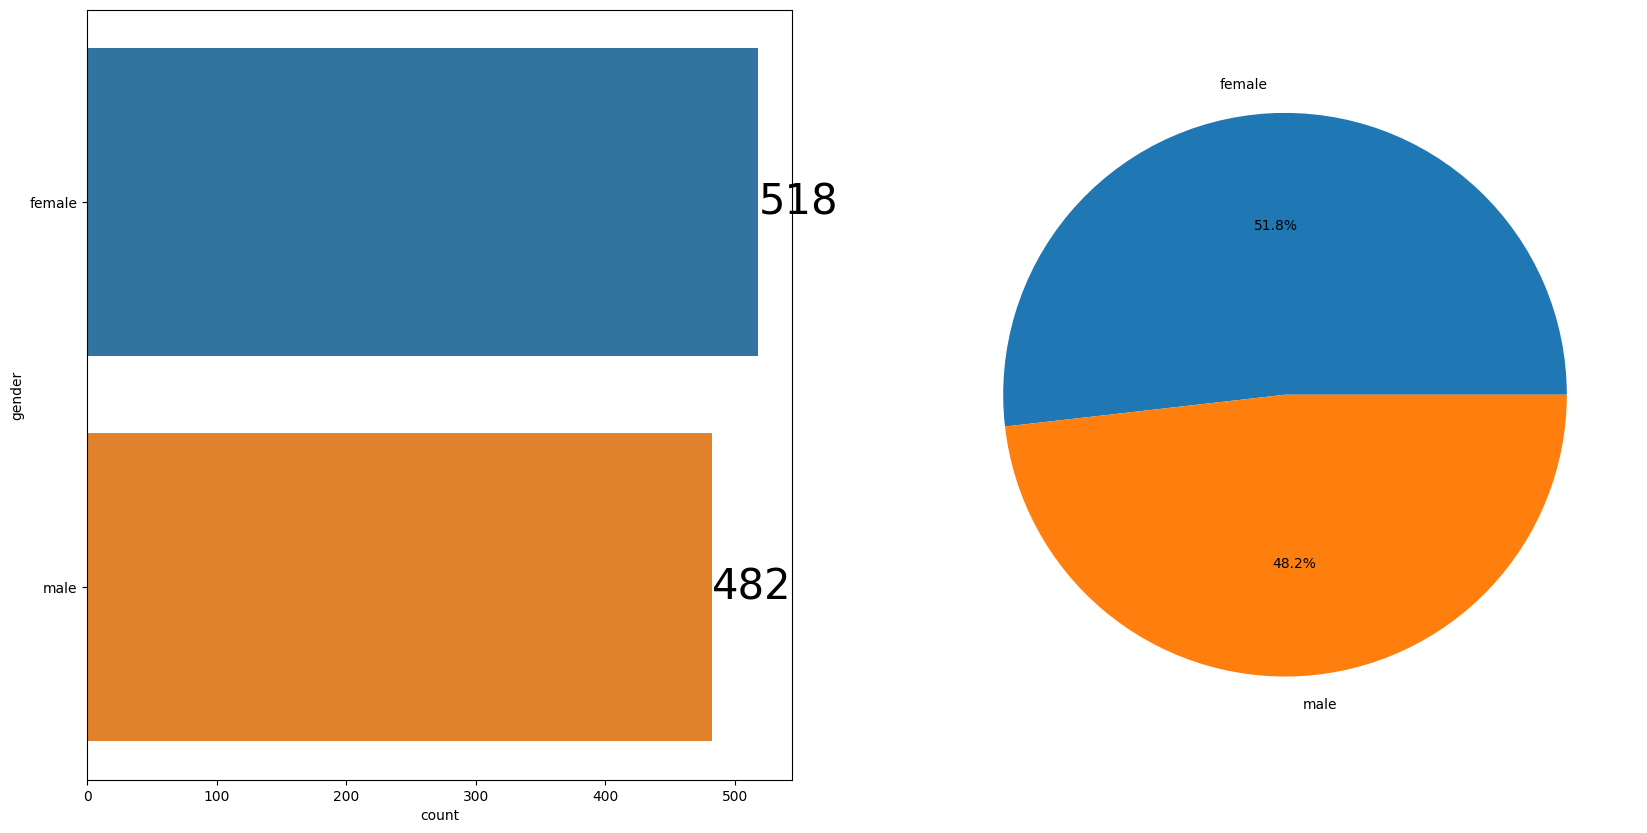

In [22]:
countPercent('gender')

#### Insights 
- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%) 

#### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? ) 

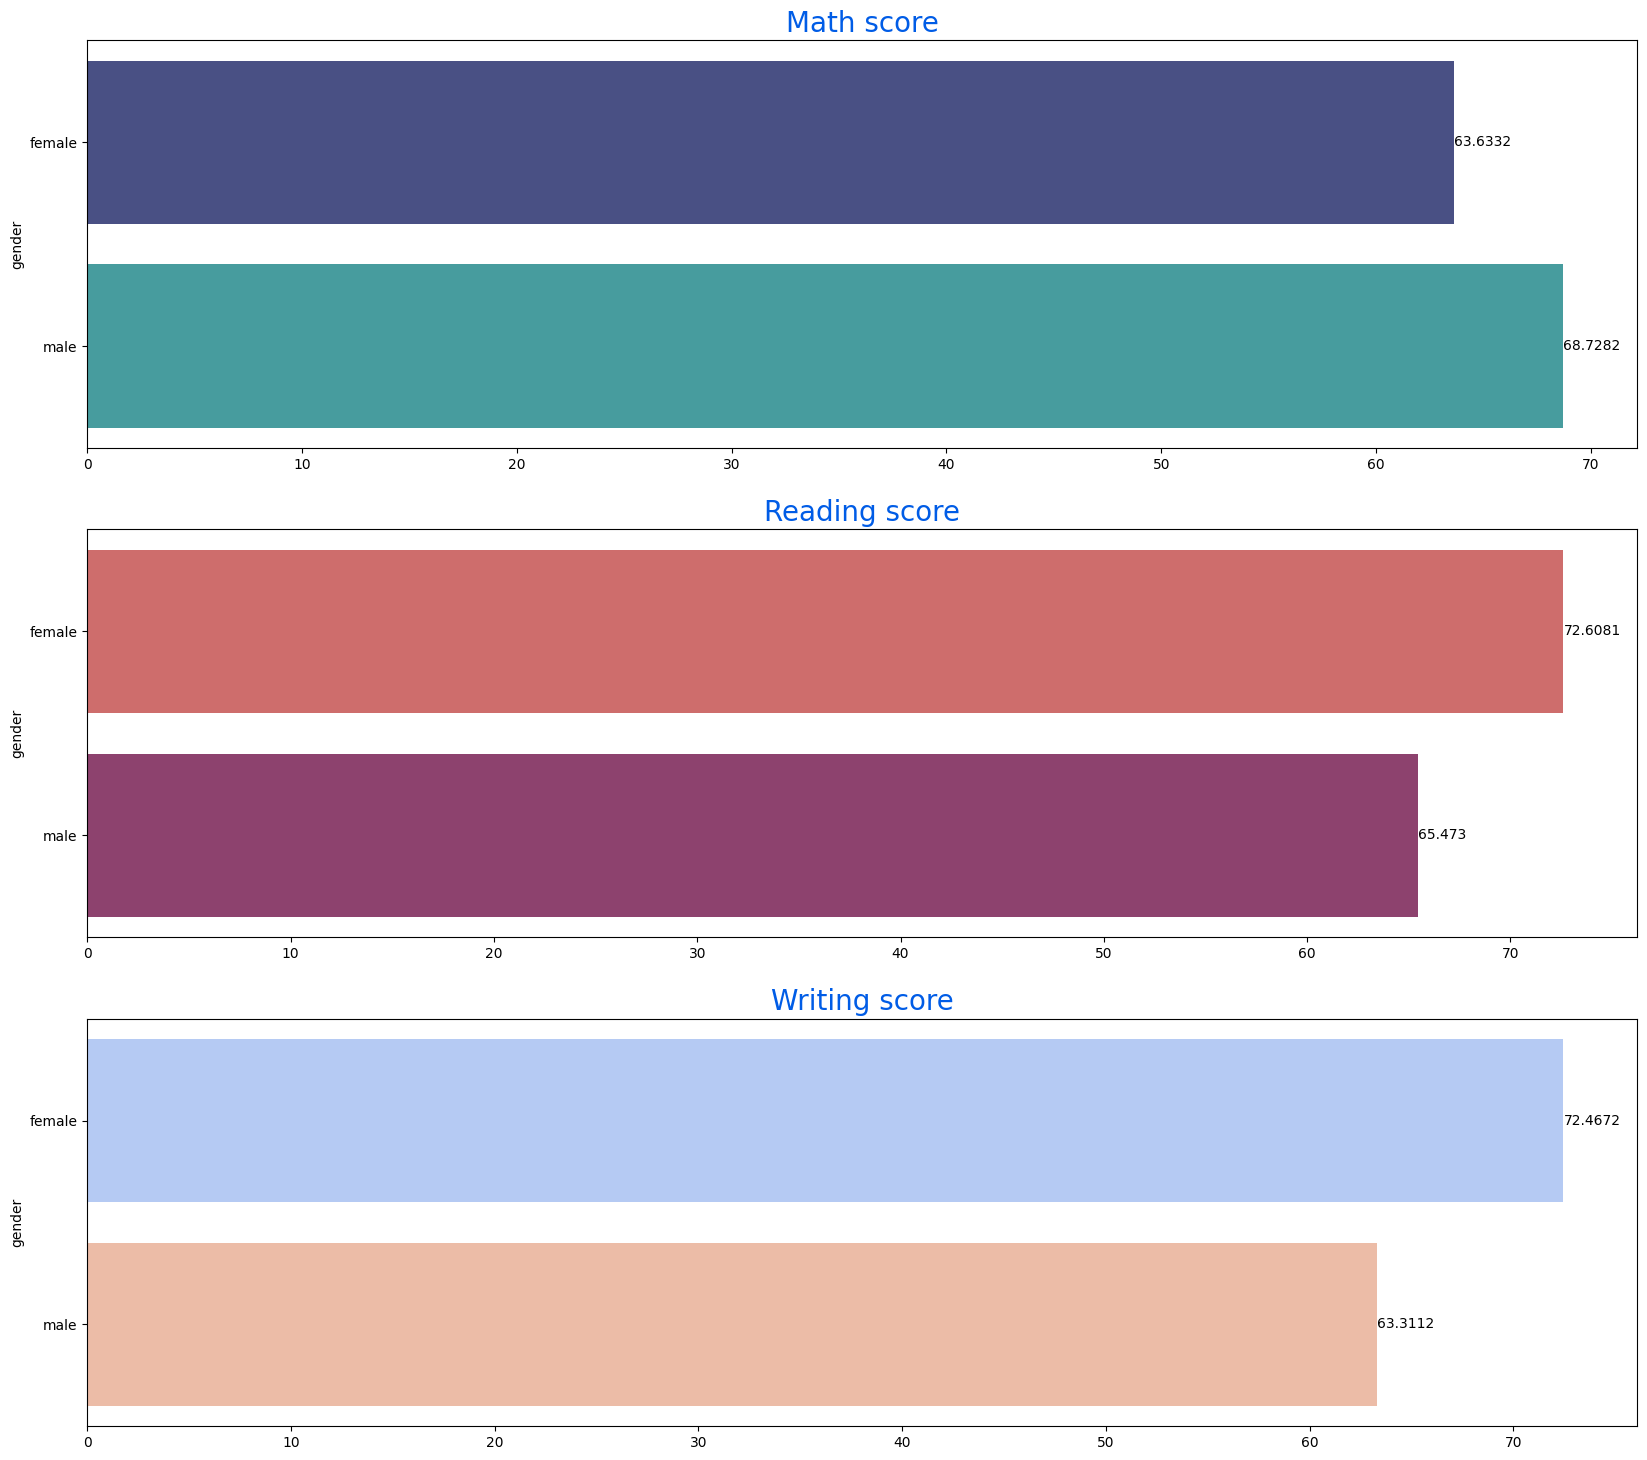

In [23]:
subjectScore('gender')

#### Insights 
- On an average females have a better overall score than men.
- whereas males have scored higher in Maths.

###  RACE/EHNICITY COLUMN
- How is Group wise distribution ?
- Is Race/Ehnicity has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

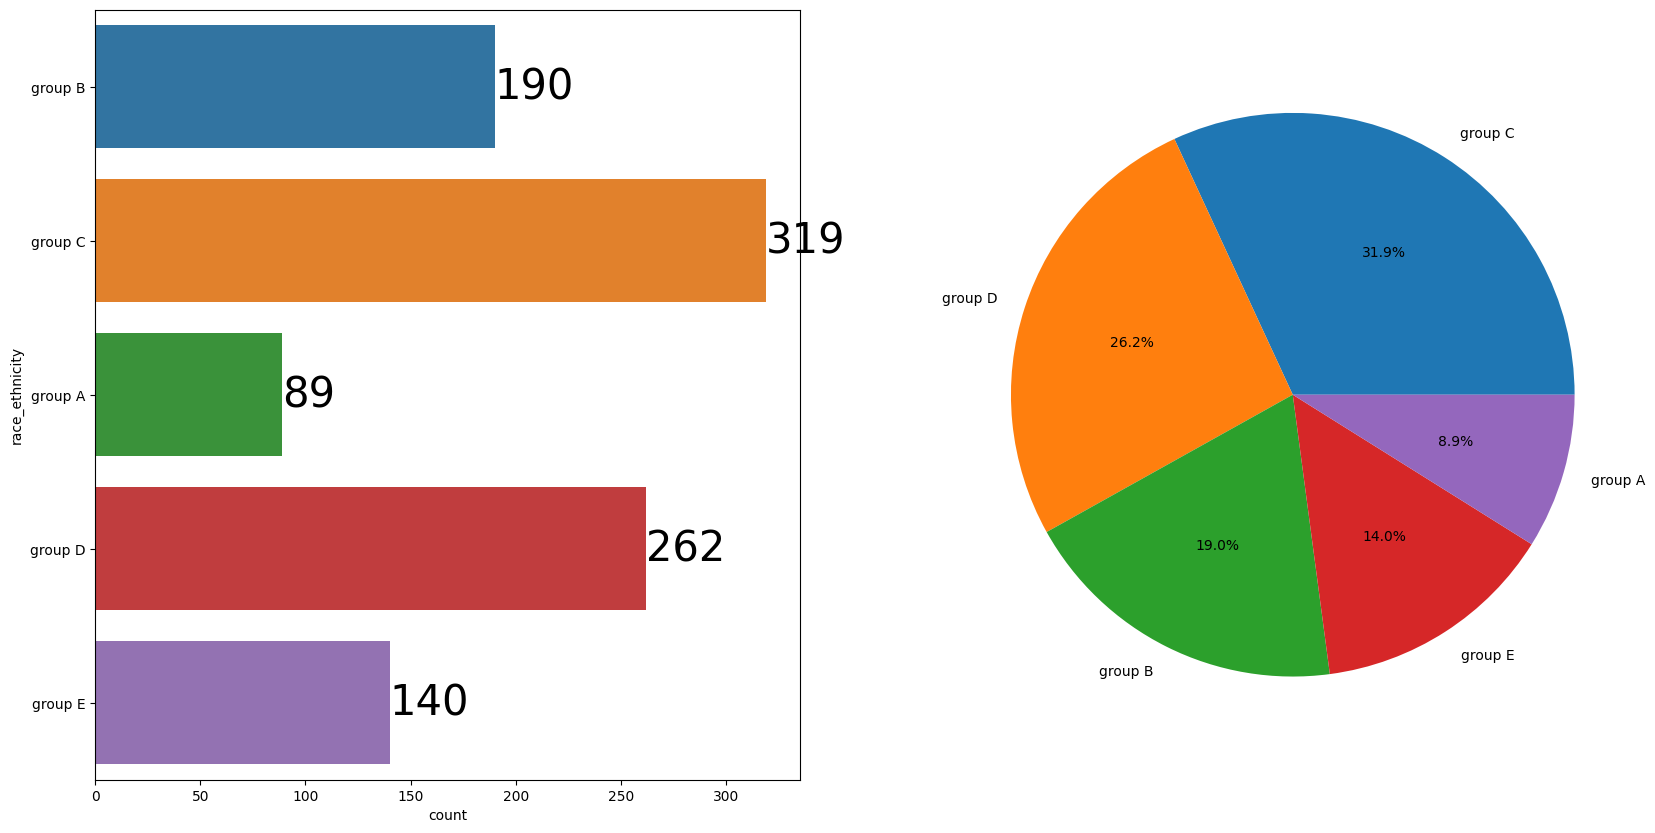

In [24]:
countPercent('race_ethnicity')

#### Insights 
- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.

#### BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

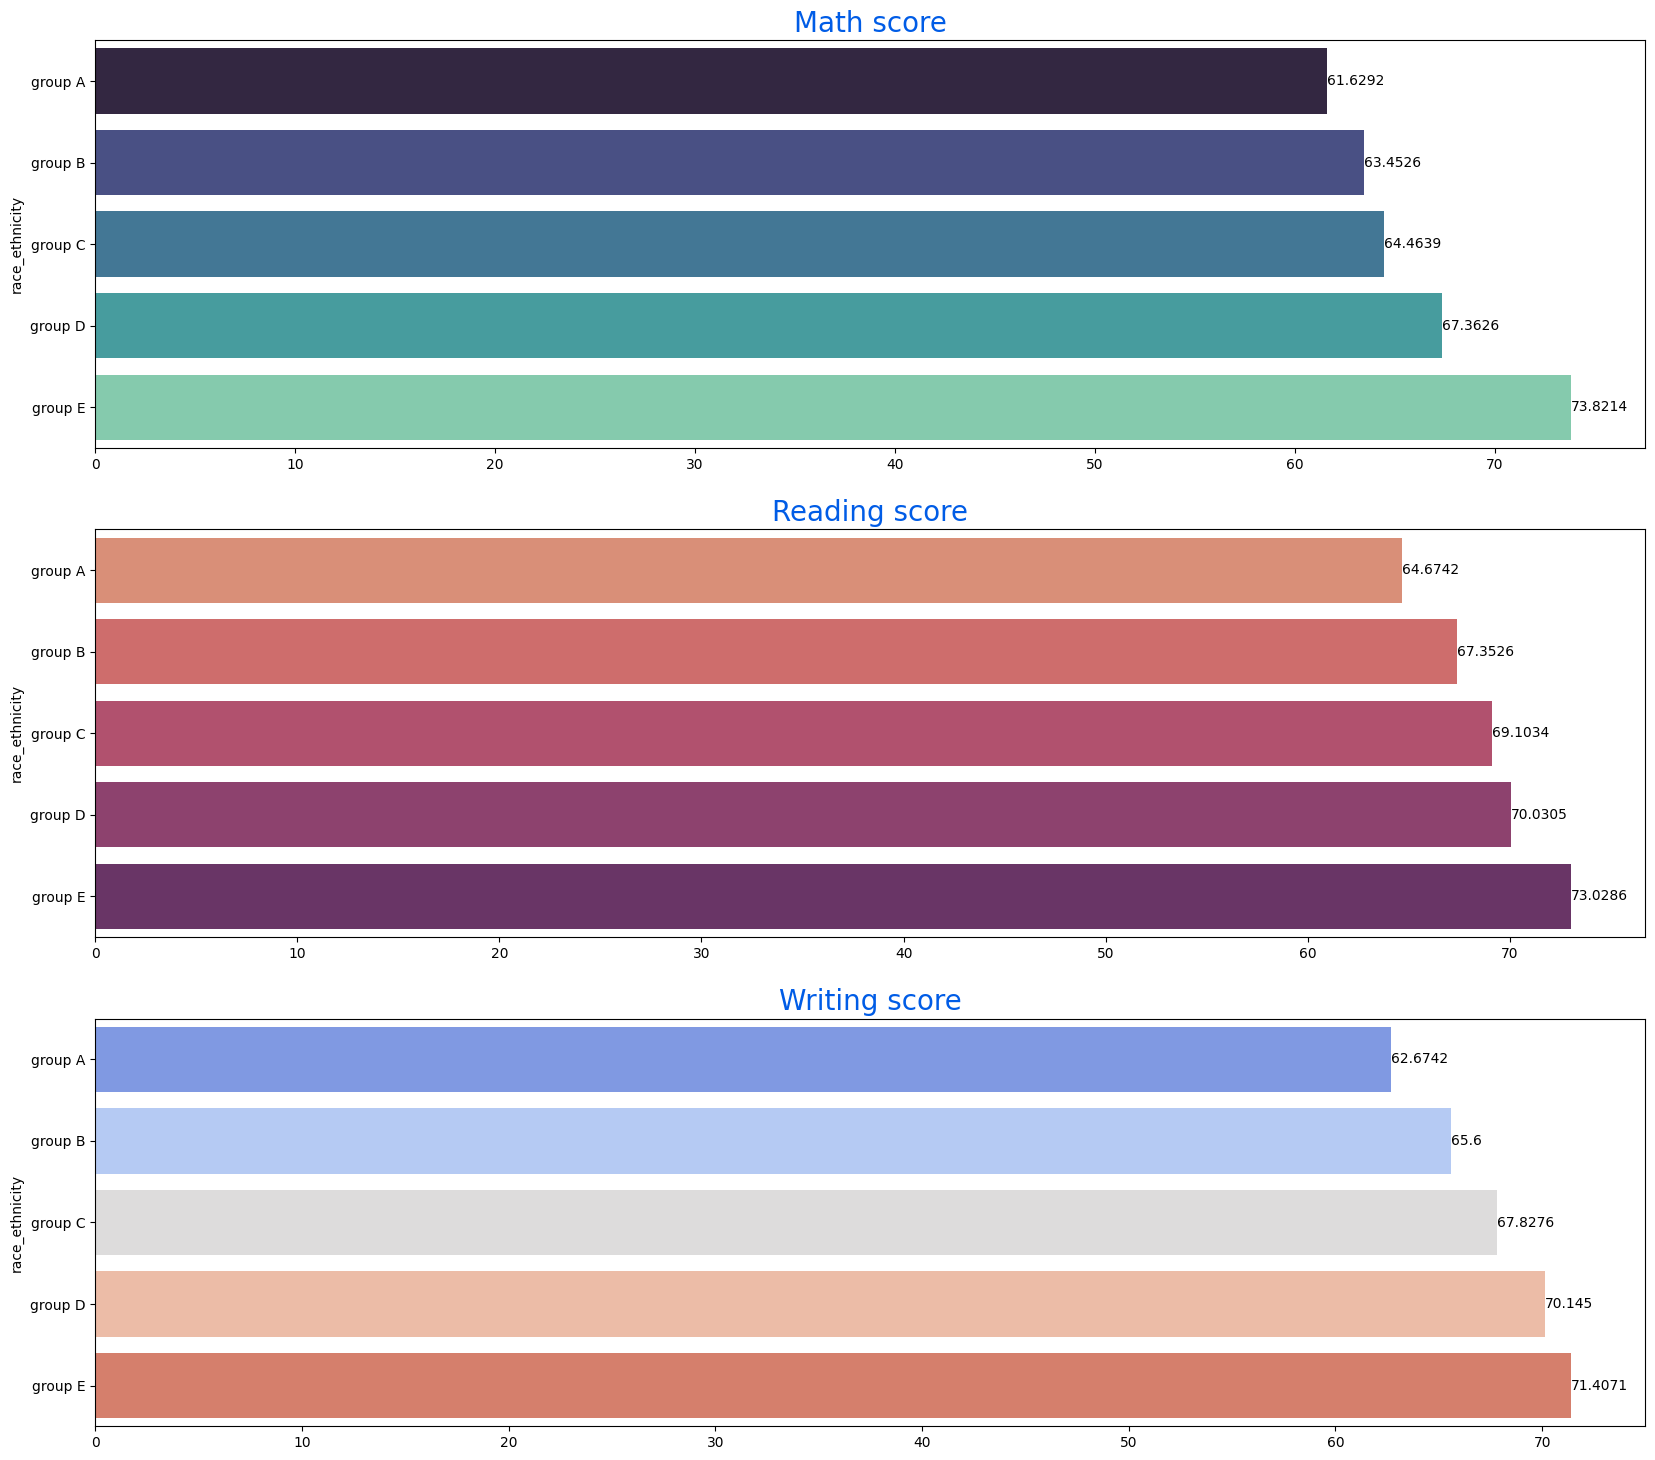

In [25]:
subjectScore('race_ethnicity')

#### Insights 
- Group E students have scored the highest marks. 
- Group A students have scored the lowest marks. 
- Students from a lower Socioeconomic status have a lower avg in all course subjects

### PARENTAL LEVEL OF EDUCATION COLUMN
- What is educational background of student's parent ?
- Is parental education has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

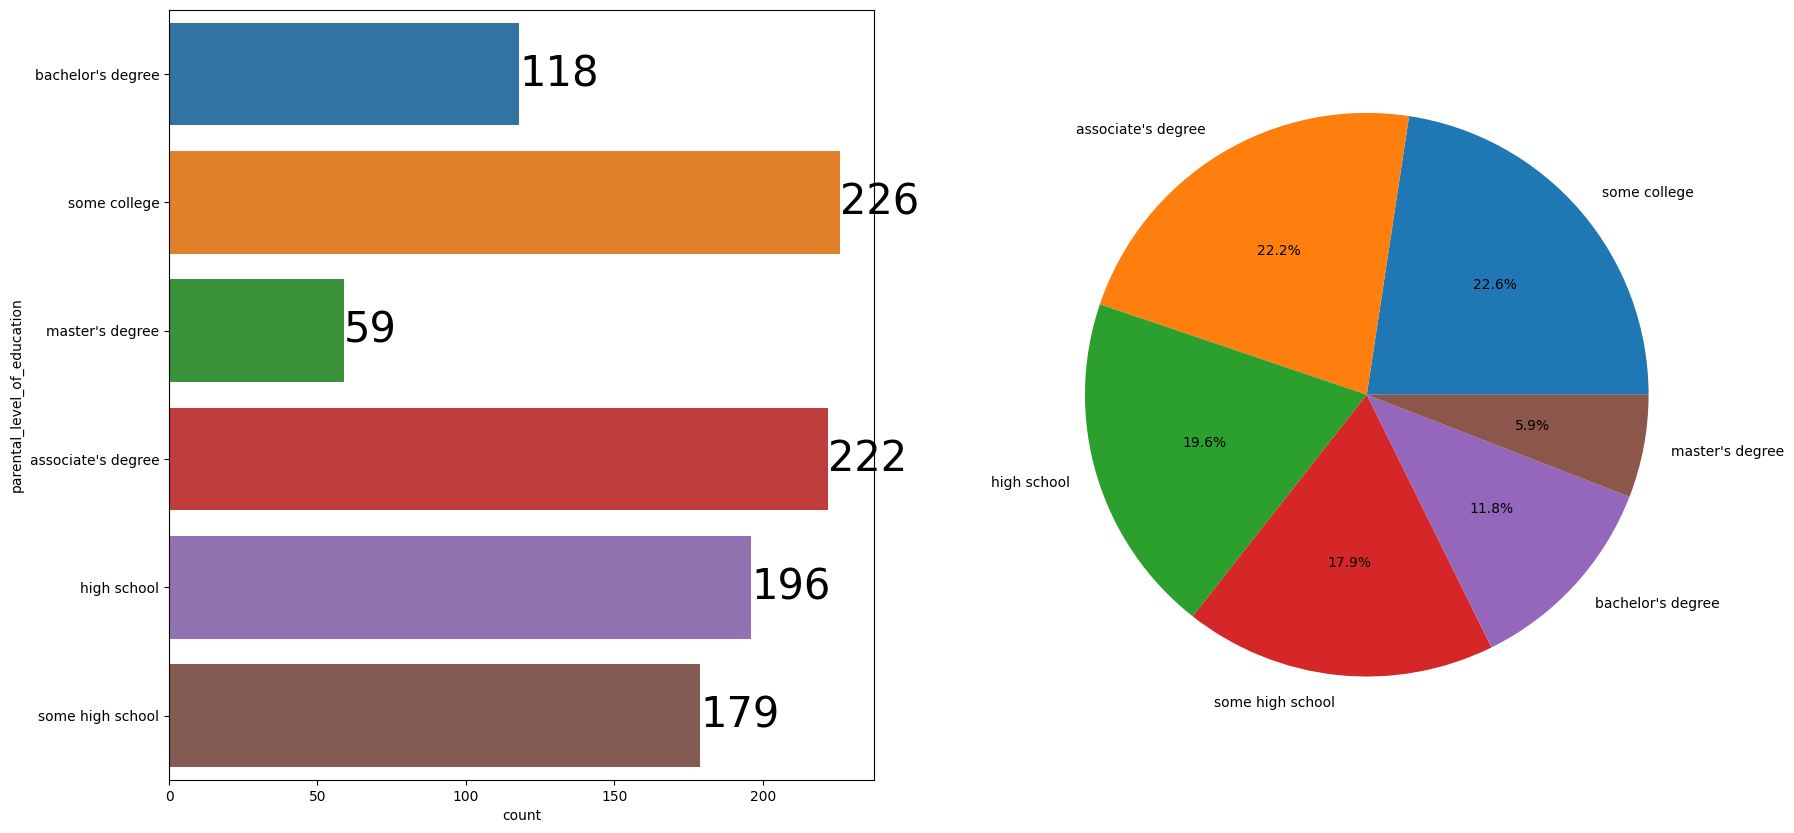

In [26]:
countPercent('parental_level_of_education')

#### Insights 
- Largest number of parents are from some college or have associate's degree.
- Very few parents have master's degree

#### BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

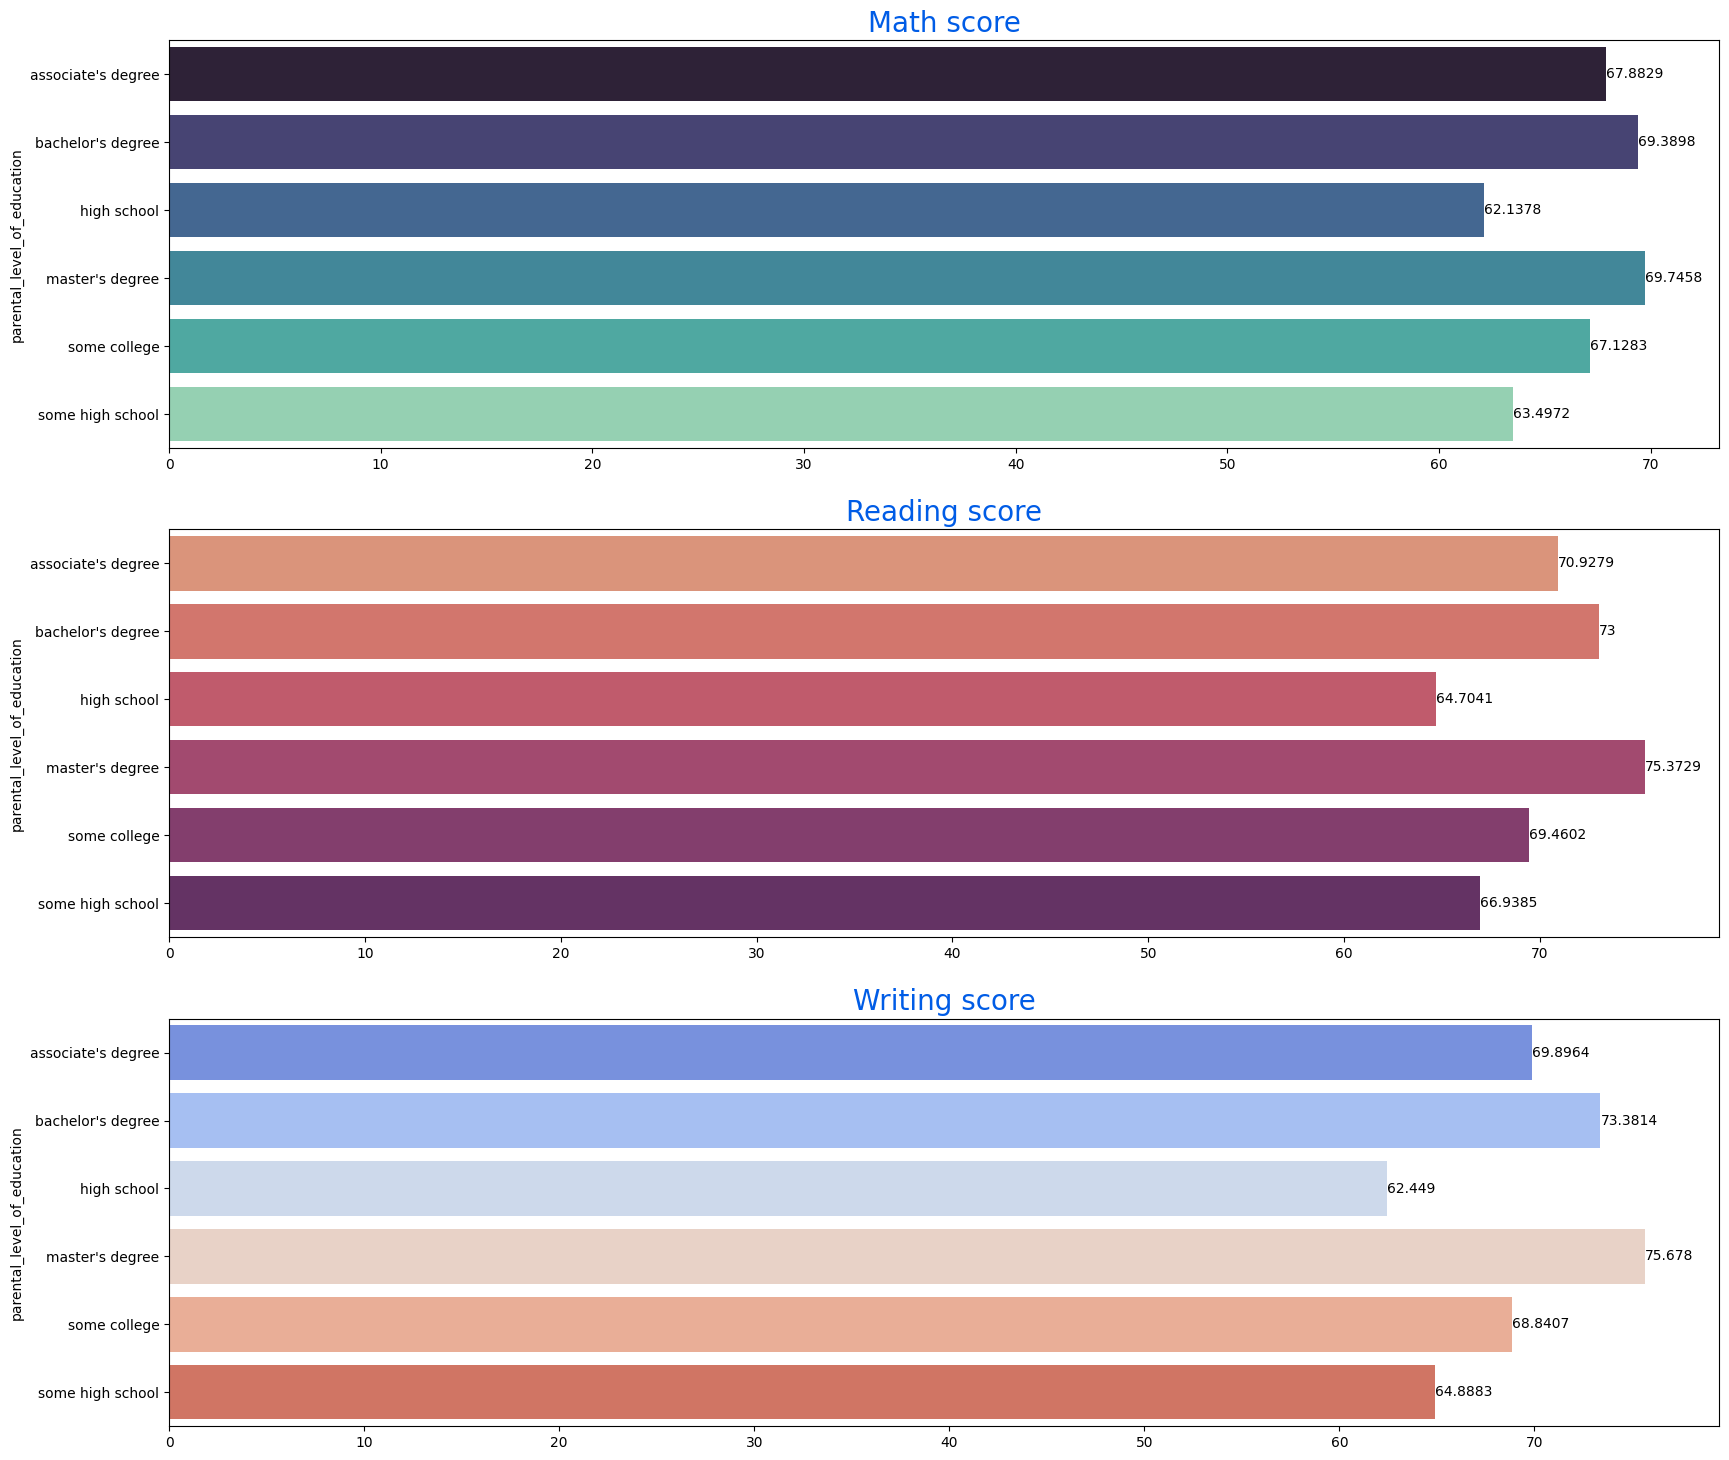

In [27]:
subjectScore('parental_level_of_education')

#### Insights 
- The score of student whose parents possess master and bachelor level education are higher than others.

### LUNCH COLUMN 
- Which type of lunch is most common amoung students ?
- What is the effect of lunch type on test results?


#### UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

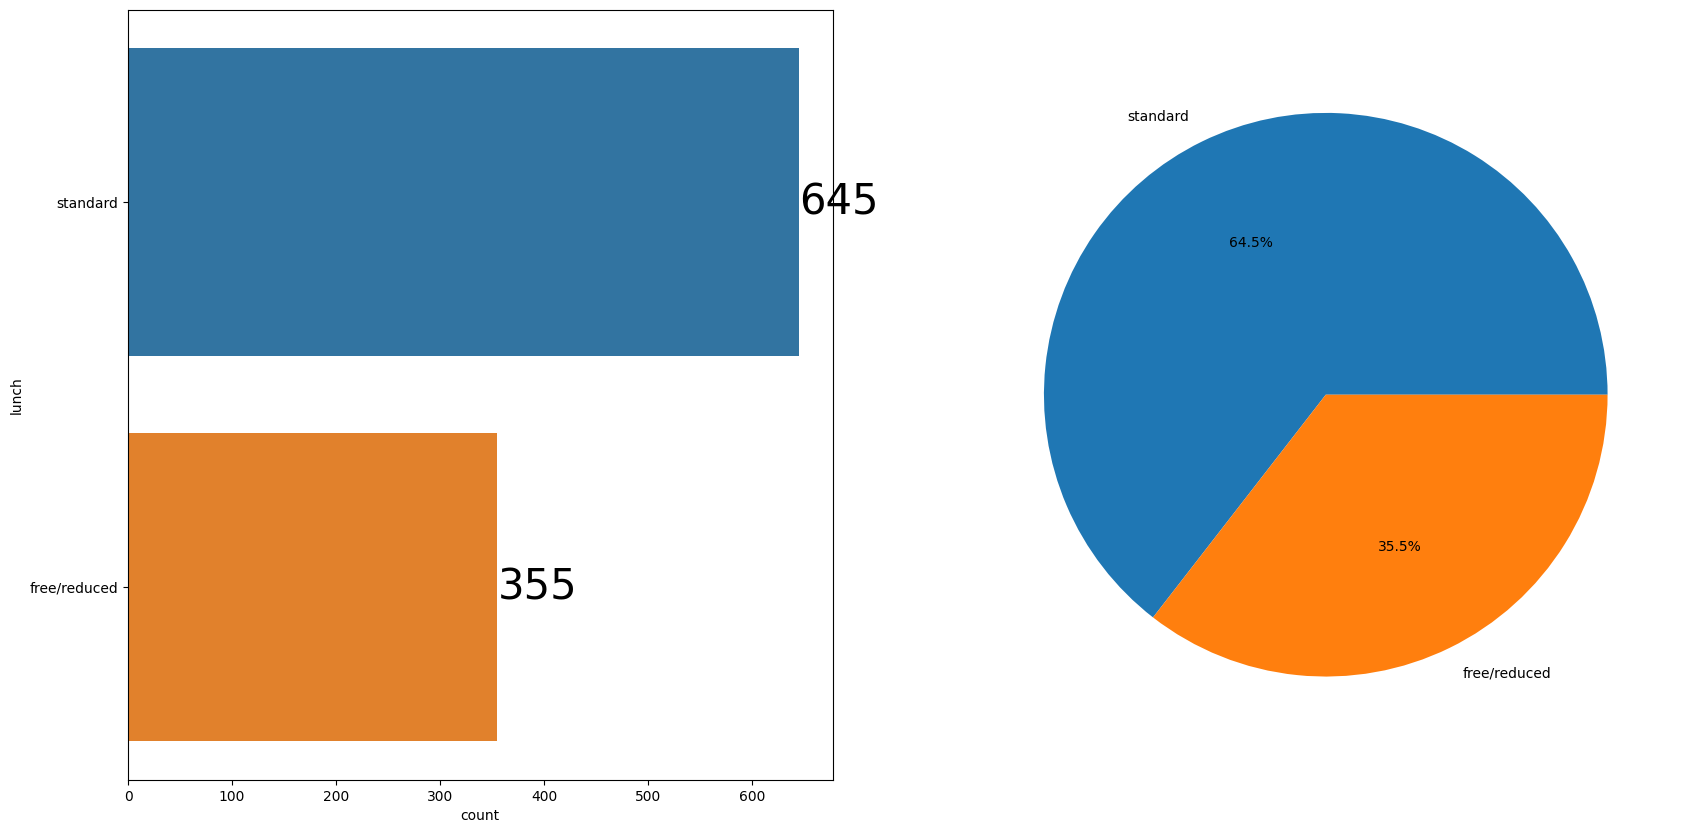

In [28]:
countPercent('lunch')

#### Insights 
- Students being served Standard lunch was more than free lunch

#### BIVARIATE ANALYSIS (  Is lunch type intake has any impact on student's performance ? )

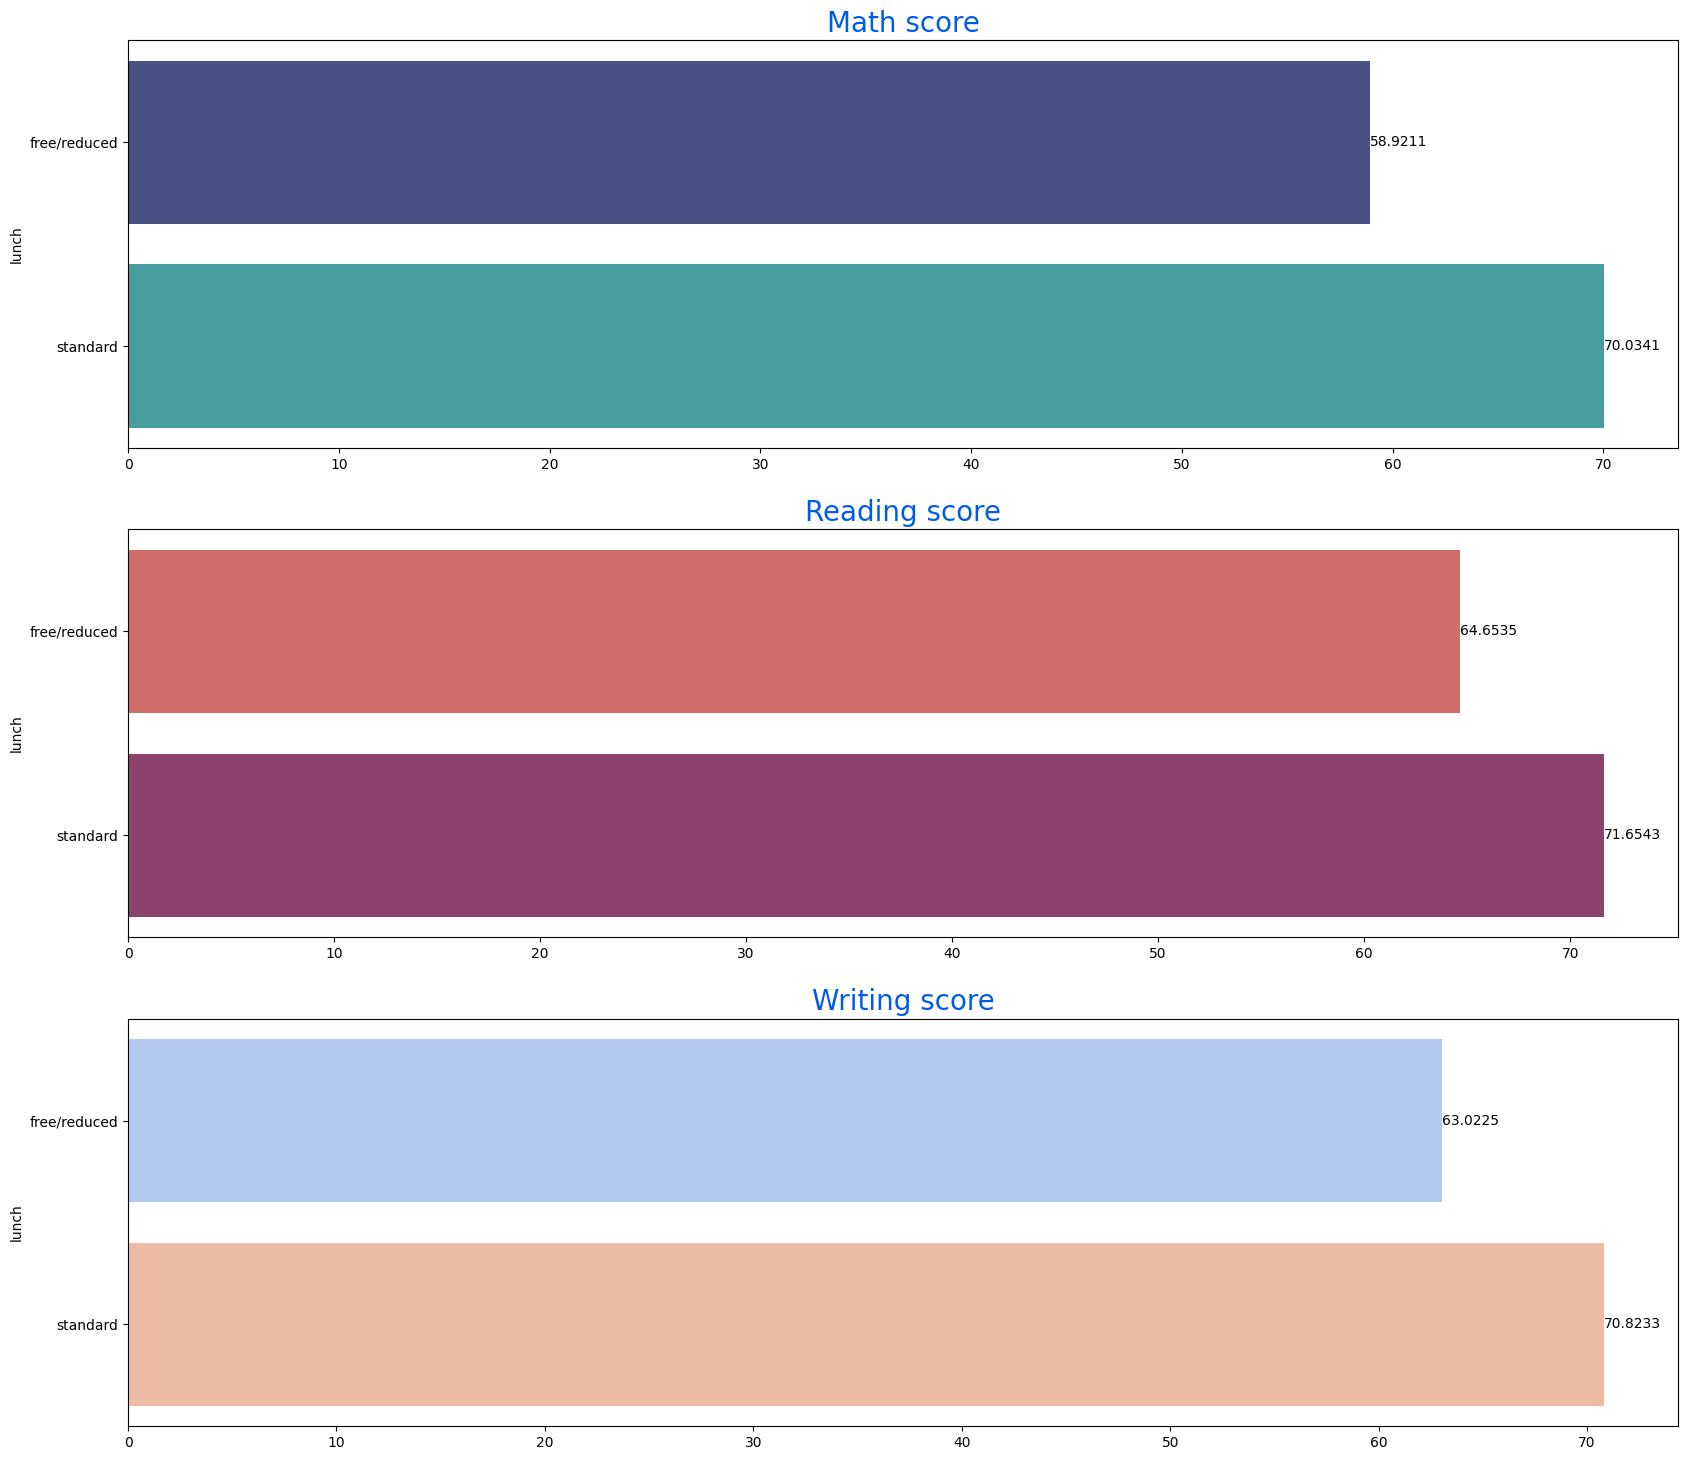

In [29]:
subjectScore('lunch')

#### Insights 
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

### TEST PREPARATION COURSE COLUMN 
- Which type of lunch is most common amoung students ?
- Is Test prepration course has any impact on student's performance ?

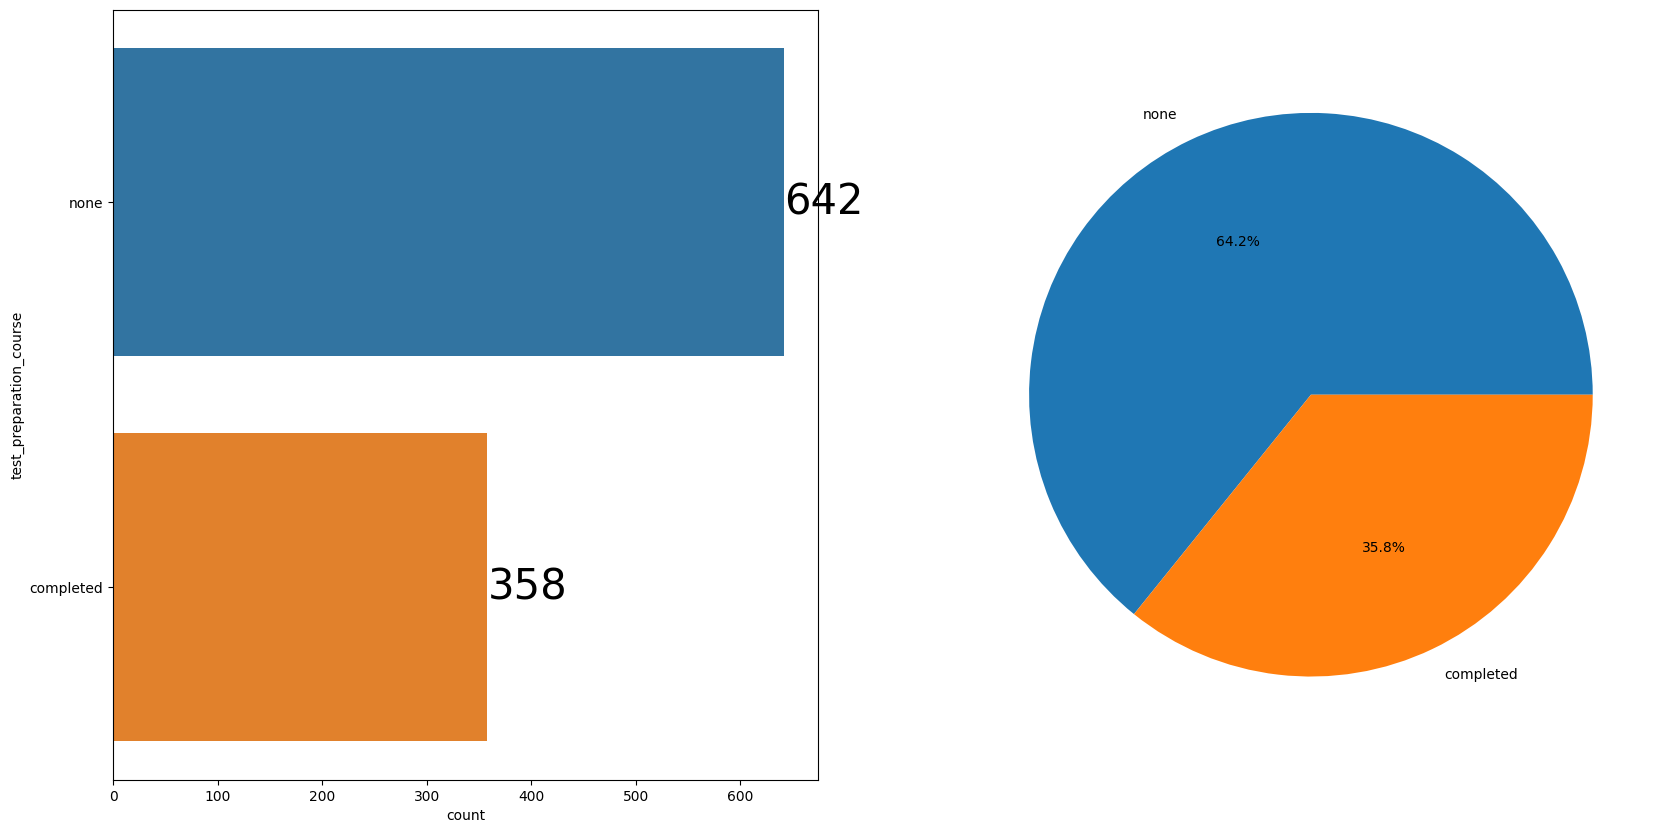

In [30]:
countPercent('test_preparation_course')

#### Insights 
- Students who have completed some kind of test prepratition course are less than the students who have not done any course

#### BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

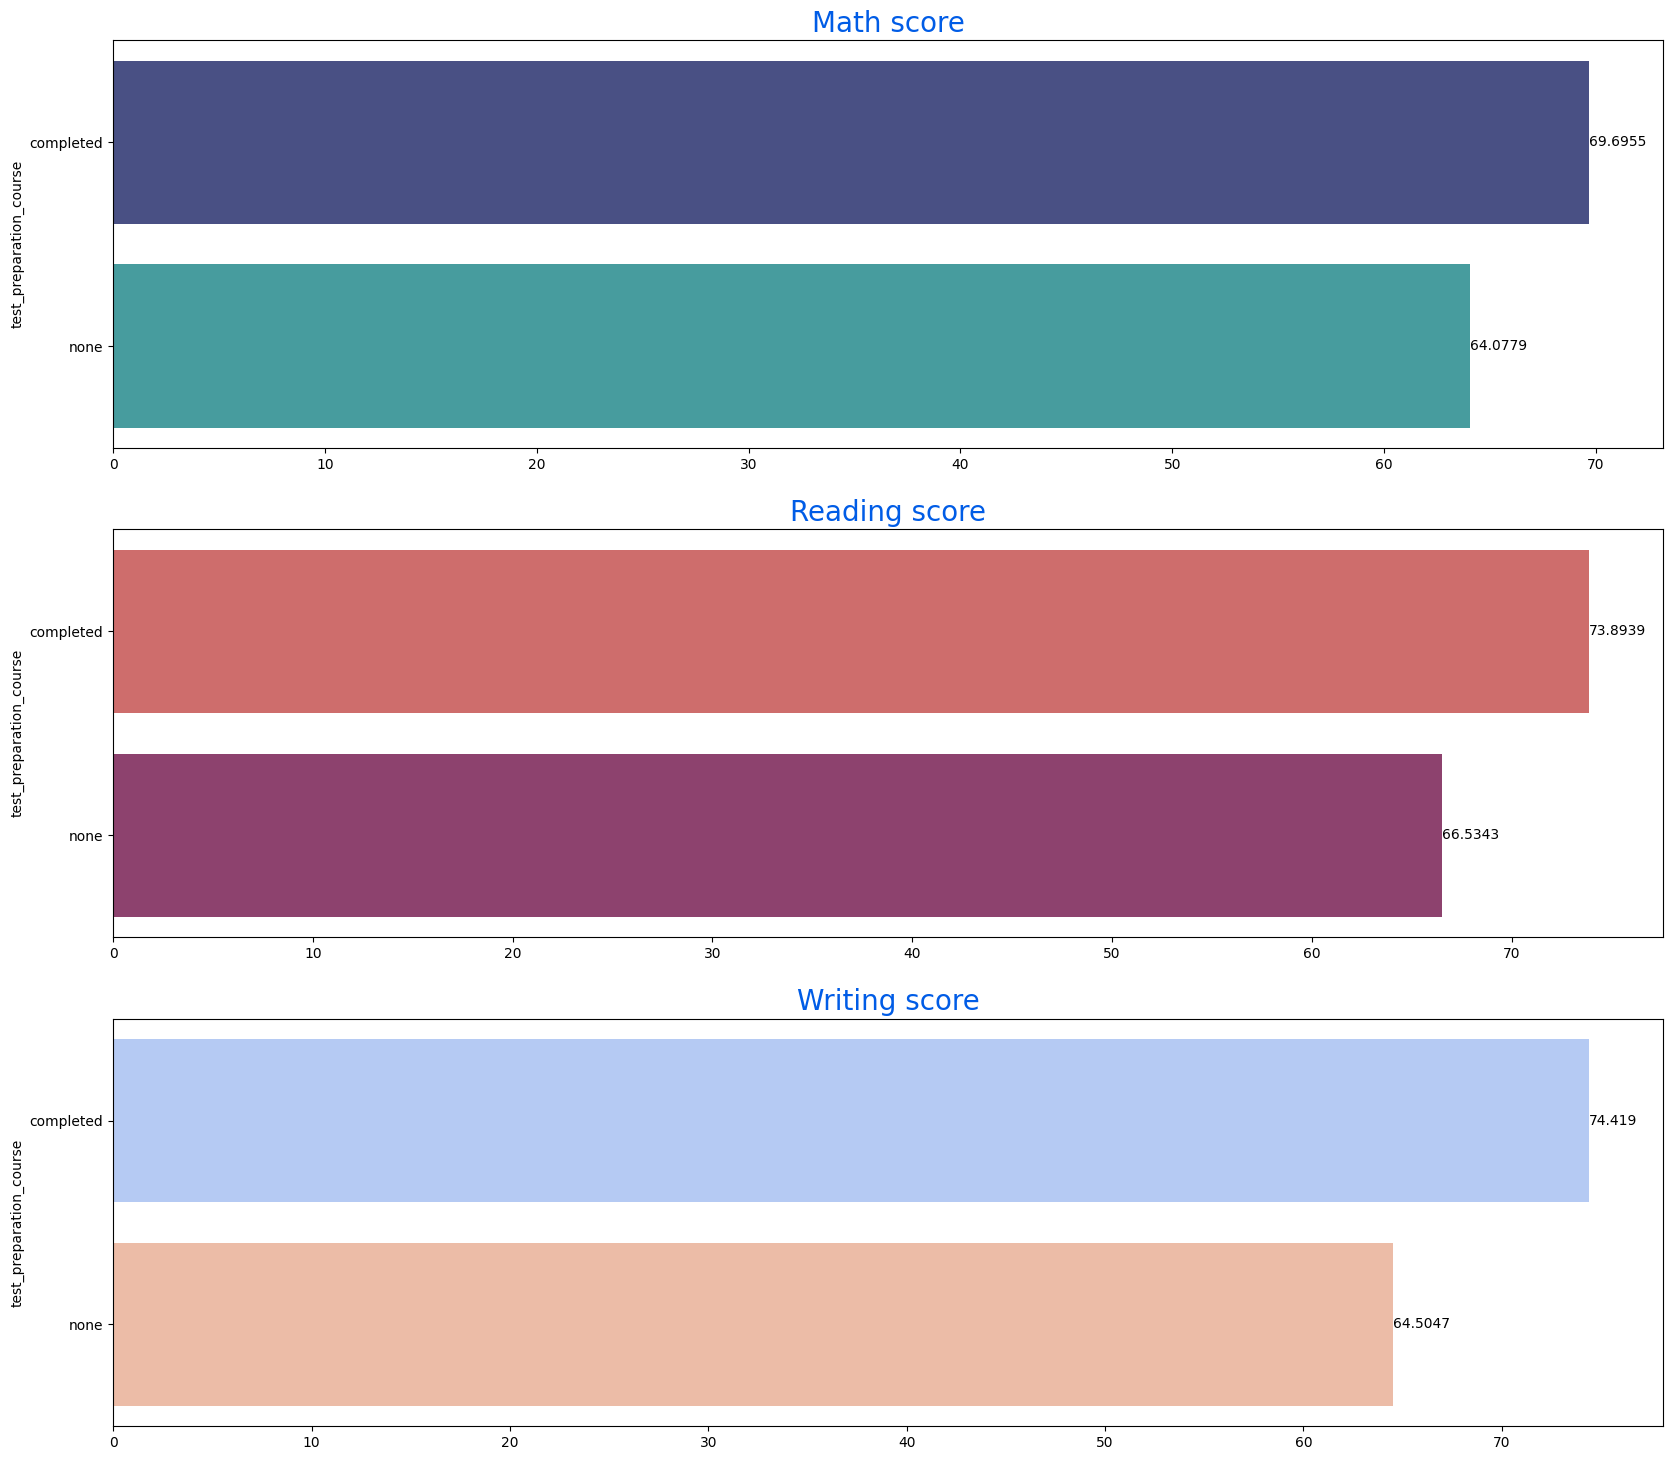

In [31]:
subjectScore('test_preparation_course')

#### Insights  
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

### CHECKING OUTLIERS

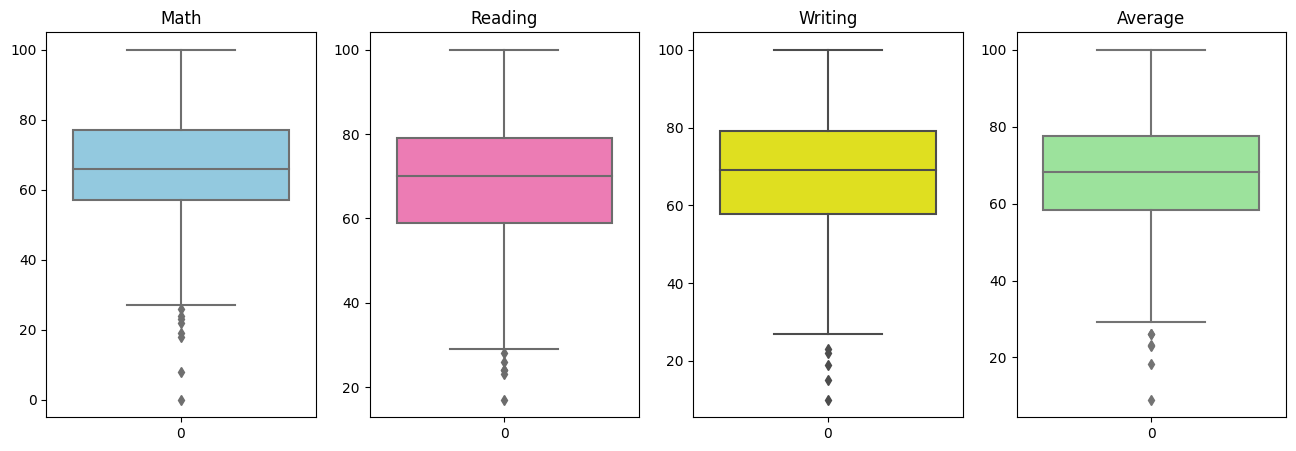

In [32]:
f, ax = plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
ax[0] = sns.boxplot(df['math_score'],color='skyblue')
ax[0].set_title('Math')
plt.subplot(142)
ax[1] = sns.boxplot(df['reading_score'],color='hotpink')
ax[1].set_title('Reading')
plt.subplot(143)
ax[2] = sns.boxplot(df['writing_score'],color='yellow')
ax[2].set_title('Writing')
plt.subplot(144)
ax[3] = sns.boxplot(df['average'],color='lightgreen')
ax[3].set_title('Average')
plt.show()

### MUTIVARIATE ANALYSIS USING PAIRPLOT

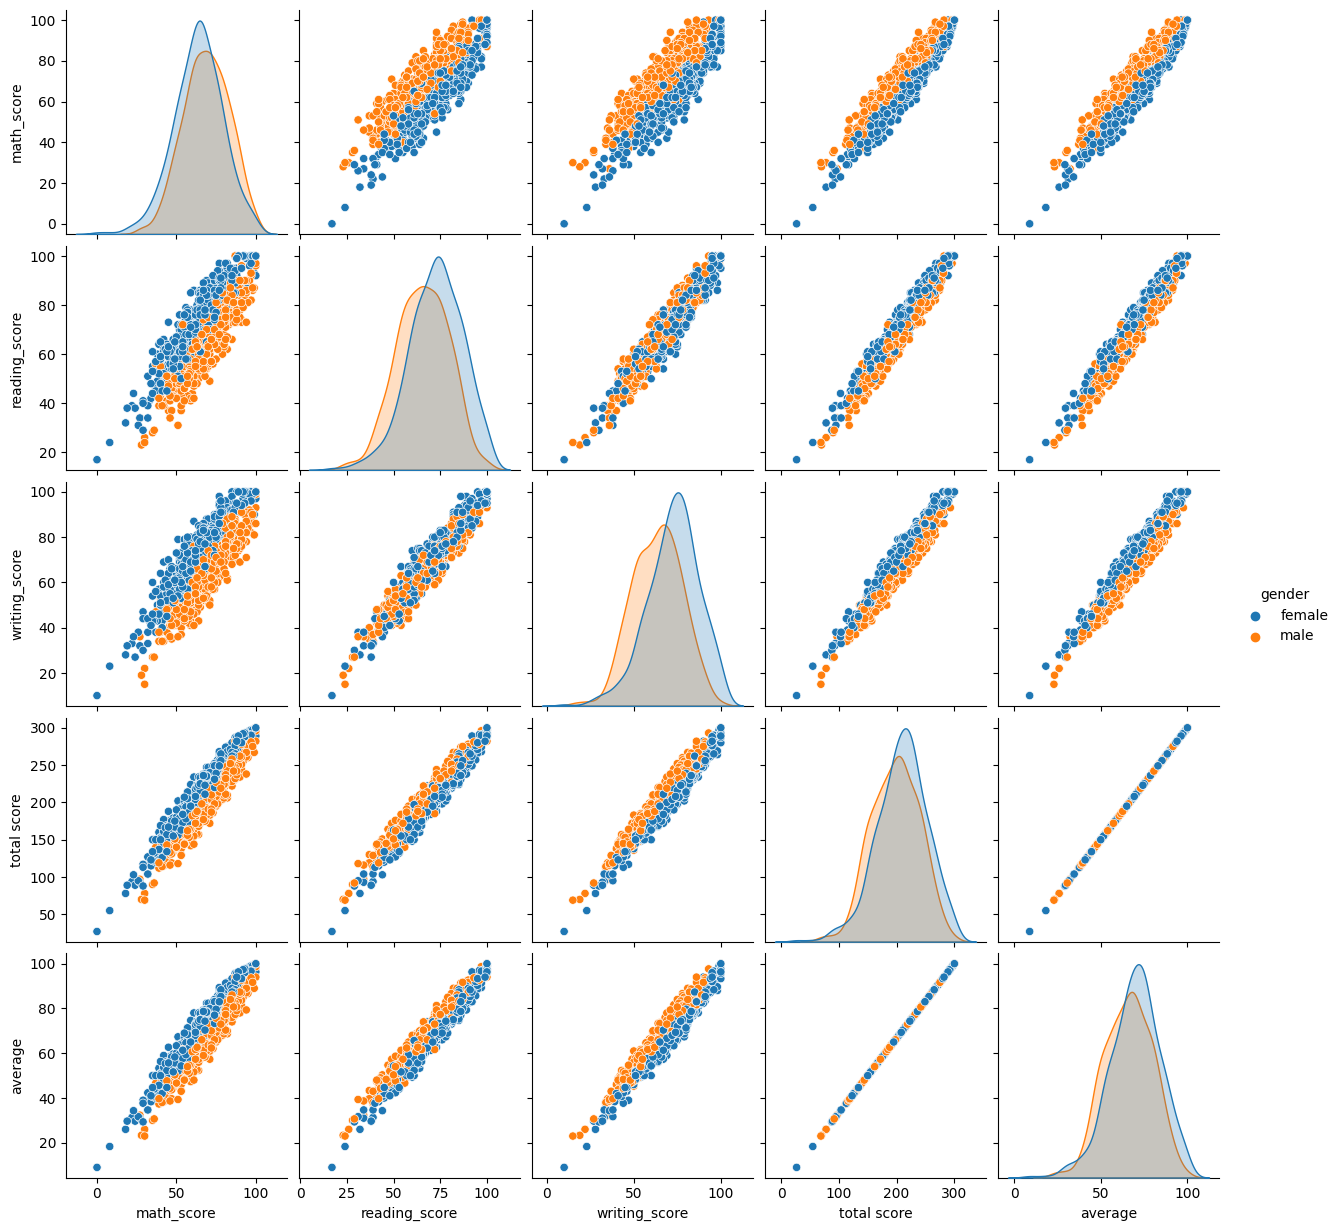

In [33]:
sns.pairplot(df,hue = 'gender')
plt.show()

#### Insights
- From the above plot it is clear that all the scores increase linearly with each other.

## Key Noteawys :
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.

# MODEL Training

### Preparing X and y variable

In [34]:
X = df.drop(columns=['math_score', 'total score', 'average'],axis=1)
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [35]:
y = df['math_score']
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

## Preprocessing 
#### - Encoding both numerical and categorical columns

In [36]:
# Create Column Transformer 
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
od_transformer = OrdinalEncoder()

preprocessor = ColumnTransformer(
    [
        ("OrdinalEncoder", od_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [37]:
# applying column transformer to our dataset X
X = preprocessor.fit_transform(X)

In [38]:
X.shape

(1000, 7)

## Spilting the training and testing dataset

In [39]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 7), (200, 7))

### Testing the MAE, MSE, RMSE and R2 score by various models

In [40]:
# writing the formula to evaluate mae, mse, rmse and r2 score
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [41]:
# all the models we will be using in our testing
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.5876
- Mean Absolute Error: 4.4947
- R2 Score: 0.8615
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3175
- Mean Absolute Error: 4.1301
- R2 Score: 0.8838


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5472
- Mean Absolute Error: 5.1733
- R2 Score: 0.8099
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.4453
- Mean Absolute Error: 5.0967
- R2 Score: 0.8293


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.5879
- Mean Absolute Error: 4.4937
- R2 Score: 0.8615
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3190
- Mean Absolute Error: 4.1308
- R2 Score: 0.8837


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.6097
- Mean Absolute Error: 4.4940
- R2 Score: 0.8604
-----------------------

In [42]:
#  dataframe consisting of r2 score of all the models
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)


,Model Name,R2_Score
0,Linear Regression,0.883803
2,Ridge,0.883736
7,CatBoosting Regressor,0.848694
8,AdaBoost Regressor,0.846824
5,Random Forest Regressor,0.844869
1,Lasso,0.829281
6,XGBRegressor,0.824909
3,K-Neighbors Regressor,0.781113
4,Decision Tree,0.731382


#### Insight :
- Linear Regression and Ridge were two of the top performing model with a R2 score of about 0.88 

#### Further testing and analysis with visualization using linear regression model

In [43]:
# using linear regression model to predict accuracy based on r2 score
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.38


Text(0, 0.5, 'Predicted')

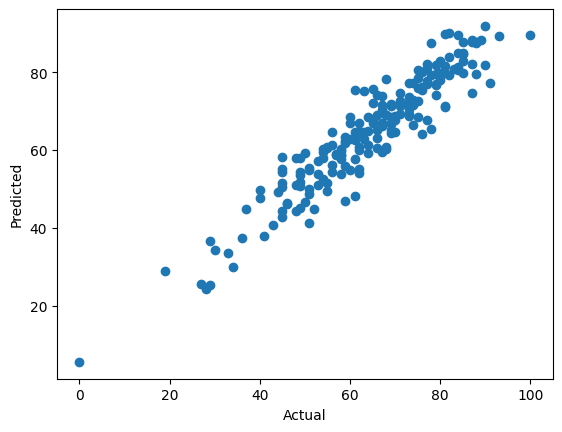

In [44]:
# scatter plot btw actual and predicted values
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='math_score'>

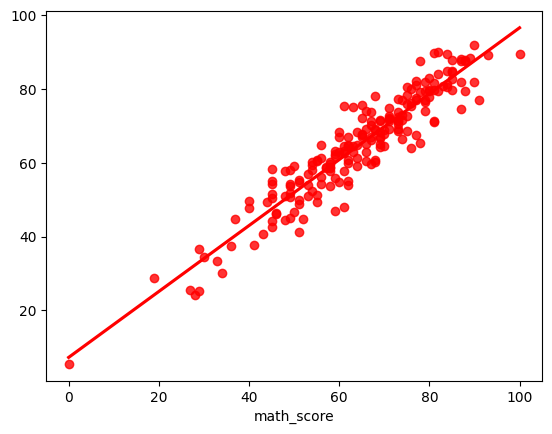

In [45]:
# to check the regression line of actual and predicted values
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')

In [46]:
# to check the difference btw actual and predicted values
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,77.118557,13.881443
737,53,57.073580,-4.073580
740,80,79.357668,0.642332
660,74,77.150932,-3.150932
411,84,84.912837,-0.912837
...,...,...,...
408,52,44.903648,7.096352
332,62,59.926534,2.073466
208,74,66.529192,7.470808
613,65,67.953852,-2.953852


# Conclusion and Findings:
#### * Female students were overall better performer than Male students with math being the only exception, where male students performed better.
#### * Students performed better in all subjest when Parent had higher education such as Master's and Bachelor's degree, Master's being the highest.
#### * Those students who took some test preparation course did better in all subjects than students who had not opted for any preparation course.
#### * Students who belonged to low socio-economic class (Group A) had a overall worst performance in all 3 subjects.
#### * Students with standard lunch also performed better than those who had free/reduced lunch.

## In our Testing out of many model LINEAR REGRESSION MODEL preformed the best with the accuracy of **88.38%**